In [55]:
import matplotlib.pyplot as plt
from splane import *
import numpy as np
import scipy.signal as sig
from splane import analyze_sys
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap
import sympy as sp
import math 

Puedo ver en el gráfico que para w=3 tenemos el cero de transmisión, siendo la transferencia de un Notch pasabajos:

$$T(s) = \frac{s^2 + {w_z}^2}{s^2+s\frac{1}{q}+1}\cdot K$$

Y viendo que la ganancia es nula, K = 1/9 y ${w_z}^2$ = 3 obtengo:

$$T(s) = \frac{1}{9} \cdot \frac{s^2 + 9}{ \left( s^2+ s \frac{1}{q} +1 \right)^2}$$


In [104]:
all_sys = []
filter_names = []

w, s, e, q = sp.symbols('w s e q') # Creamos las variables que usaremos en nuestras funciones.
H, f, Dem, p, np, result = sp.symbols('H, f, Dem p np result', cls=sp.Function) # Creamos ls funciones que usaremos.

H = (s**2 + 9) / sp.expand((s**2 + s * 1/1 + 1)*(s + 1 + 10 * sp.I)*(s + 1 - 10 * sp.I))

display(Math('H(s) = \\frac{1}{9} \\cdot'+ sp.latex(H)))

<IPython.core.display.Math object>

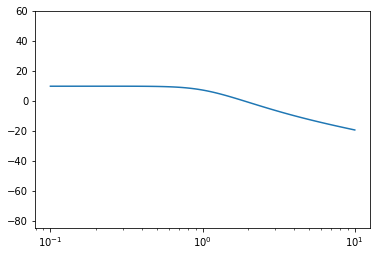

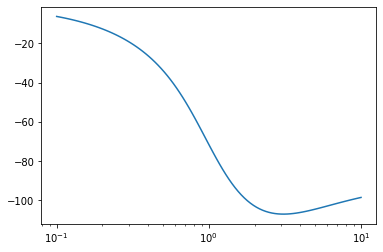

In [107]:
num=[1,3]
dem=[1,1.4142,1]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-85,60])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

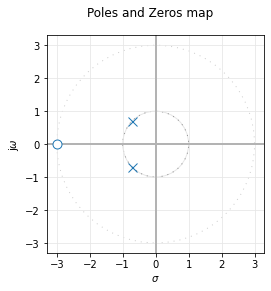

In [108]:


pzmap(sys) # Diagrama de polos y ceros. Función con efectos colaterales.